In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [73]:
def matchTem(imgName):
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
    
    #print(imgName)
    img = cv2.imread(imgName,0)
    img2 = img.copy()
    for j in range(10):
        matchCount = 0
        temName = 't{}.jpg'.format(j)
        template = cv2.imread(temName,0)
        w, h = template.shape[::-1]
        
        for meth in methods:
            img = img2.copy()
            method = eval(meth)

            # Apply template Matching
            res = cv2.matchTemplate(img,template,method)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

            # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
            if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
                top_left = min_loc
            else:
                top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)
            
            #调整阈值
            if(top_left[0] >= 50 and top_left[0] <= 60 and top_left[1] >= 20 and top_left[1] <= 40):
            #print('top_left is :', top_left)
            #print('bottom_right is:', bottom_right)

                matchCount += 1
                
                #只添加最后一种模式 这里可以去掉if显示全部模式
                if(matchCount >= 5):
                    cv2.rectangle(img,top_left, bottom_right, (255,120,255), 2)
                    plt.figure()
                    plt.subplot(121),plt.imshow(res, cmap = 'gray')
                    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
                    plt.subplot(122),plt.imshow(img, cmap = 'gray')
                    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
                    plt.suptitle(meth)
                    break
                
        if( matchCount >= 5):
            plt.show()
            print imgName, 'this picture is number :', j
            return 
        

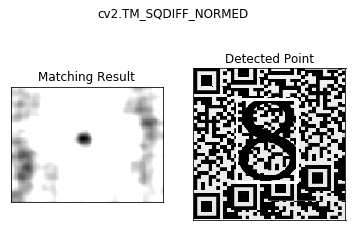

download-0.png this picture is number : 8


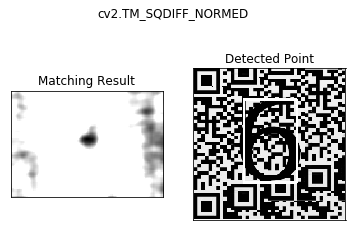

download-1.png this picture is number : 6


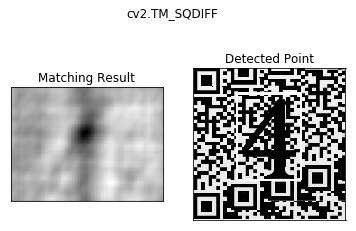

download-2.png this picture is number : 4


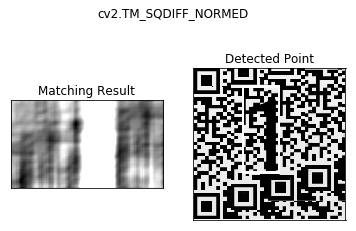

download-3.png this picture is number : 1


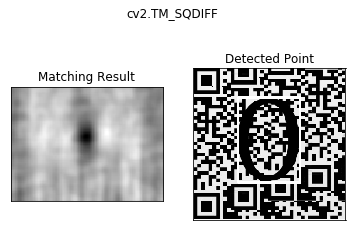

download-4.png this picture is number : 0


In [74]:
for i in range(5):
    imgName = 'download-{}.png'.format(i)
    matchTem(imgName)